In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-influenza/df_both_test.csv
/kaggle/input/dataset-influenza/df_pcr_test.csv
/kaggle/input/dataset-influenza/df_ant_test.csv
/kaggle/input/datasetinfluenzaunbalanced/df_ant_unb.csv
/kaggle/input/datasetinfluenzaunbalanced/df_pcr_unb.csv
/kaggle/input/datasetinfluenzaunbalanced/df_both_unb.csv


In [2]:
both_data = pd.read_csv("../input/dataset-influenza/df_both_test.csv")
del both_data['Unnamed: 0']
pcr = pd.read_csv("../input/dataset-influenza/df_pcr_test.csv")
del pcr['Unnamed: 0']
rapid= pd.read_csv("../input/dataset-influenza/df_ant_test.csv")
del rapid['Unnamed: 0']

both_data_unb = pd.read_csv("../input/datasetinfluenzaunbalanced/df_both_unb.csv")
del both_data_unb['Unnamed: 0']
pcr_unb = pd.read_csv("../input/datasetinfluenzaunbalanced/df_pcr_unb.csv")
del pcr_unb['Unnamed: 0']
rapid_unb= pd.read_csv("../input/datasetinfluenzaunbalanced/df_ant_unb.csv")
del rapid_unb['Unnamed: 0']

In [3]:
both_data

,CS_SEXO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,Class
0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0
1,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0
2,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,0
3,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,0
4,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1
4208,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1
4209,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1
4210,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1


In [4]:
def rename_columns_index_en(data):
    
    new_names = ['Gender','Fever','Cough','Sore Throat','Dyspnea',
                 'Respiratory Discomfort','Oxygen Saturation','Diarrhea',
                 'Vomit','Abdominal Pain','Fatigue','Olfactory Disorders',
                 'Taste Disorder','Class']
    
    data.columns = new_names
    data.index = new_names
    return data

def rename_columns_index_pt(data):
    
    new_names = ['Gênero','Febre','Tosse','Dor de Garganta','Dispnéia',
                 'Desconforto Respiratório','Saturação do Oxigenio','Diarreia',
                 'Vomito','Dor Abdominal','Fadiga', 'Distúrbios do Olfato',
                 'Distúrbio do paladar','Classe']
    
    data.columns = new_names
    data.index = new_names
    return data

In [5]:
def get_corr_matrix(data,lang='en'):
    cor_data = data.corr()
    cor_data = cor_data.round(2)
    if lang == 'pt':
        cor_data = rename_columns_index_pt(cor_data)
    else:
        cor_data = rename_columns_index_en(cor_data)
    return cor_data


In [6]:
def plot_correlation_matrix(df_both,df_pcr,df_rapid,title_both,title_pcr,
                            title_rapid,color_type,fig_name, lang):
    
    cor_both_data = get_corr_matrix(df_both,lang)
    cor_pcr_data = get_corr_matrix(df_pcr,lang)
    cor_rapid_data = get_corr_matrix(df_rapid,lang)
    
    fig, ax =plt.subplots(1,3,figsize=(15,5))
    sns.heatmap(cor_both_data, annot=False,linewidths=.5, cmap=color_type, ax=ax[0])
    ax[0].set_title(title_both)
    sns.heatmap(cor_pcr_data, annot=False,linewidths=.5,cmap=color_type, ax=ax[1])
    ax[1].set_title(title_pcr)
    sns.heatmap(cor_rapid_data, annot=False,linewidths=.5, cmap=color_type, ax=ax[2])
    ax[2].set_title(title_rapid)
    fig.tight_layout(pad=0.5)
    plt.savefig(fig_name)
    fig.show()

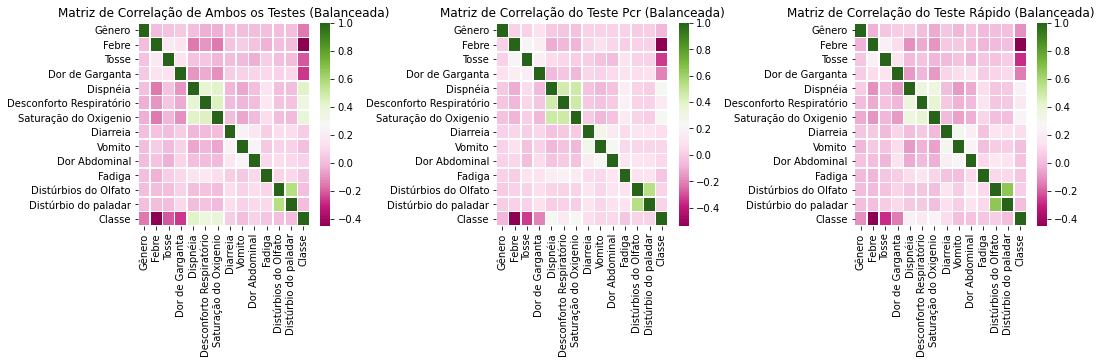

In [7]:
plot_correlation_matrix(both_data,pcr,rapid,
                        'Matriz de Correlação de Ambos os Testes (Balanceada)',
                        'Matriz de Correlação do Teste Pcr (Balanceada)',
                        'Matriz de Correlação do Teste Rápido (Balanceada)',
                        "PiYG",'influenza_correlation_matrix_pt_balanced.png', 'pt')

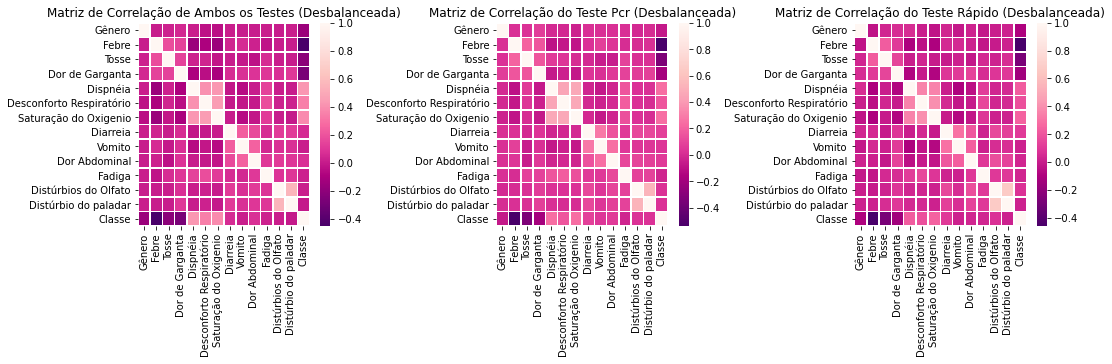

In [8]:
plot_correlation_matrix(both_data_unb,pcr_unb,rapid_unb,
                        'Matriz de Correlação de Ambos os Testes (Desbalanceada)',
                        'Matriz de Correlação do Teste Pcr (Desbalanceada)',
                        'Matriz de Correlação do Teste Rápido (Desbalanceada)',
                        "RdPu_r",'influenza_correlation_matrix_pt_unbalanced.png', 'pt')

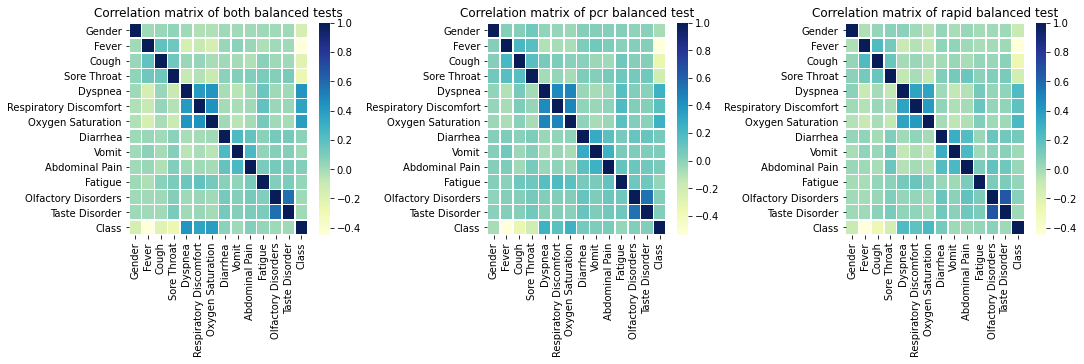

In [9]:
plot_correlation_matrix(both_data,pcr,rapid,
                        'Correlation matrix of both balanced tests',
                        'Correlation matrix of pcr balanced test',
                        'Correlation matrix of rapid balanced test',
                        "YlGnBu",'influenza_correlation_matrix_en_balanced.png', 'en')

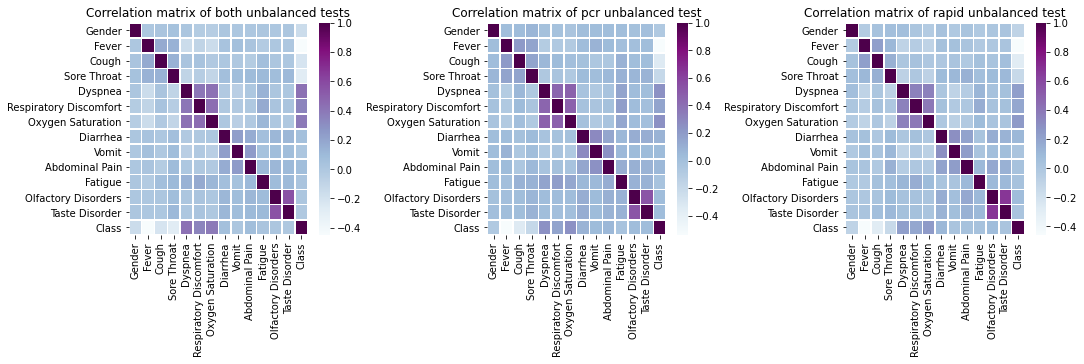

In [10]:
plot_correlation_matrix(both_data_unb,pcr_unb,rapid_unb,
                        'Correlation matrix of both unbalanced tests',
                        'Correlation matrix of pcr unbalanced test',
                        'Correlation matrix of rapid unbalanced test',
                        "BuPu",'influenza_correlation_matrix_en_unbalanced.png', 'en')